
# <center> BITCOIN PRICE PREDICTION </center>

For downloading the dataset: 

https://github.com/prathimacode-hub/ML-ProjectKart/tree/main/Bitcoin%20Price%20Prediction

## Importing Libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [200]:
#Reading csv file
df = pd.read_csv('bitcoin_dataset.csv')

In [201]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [202]:
df.shape

(2906, 24)

### Check for missing values

<AxesSubplot:>

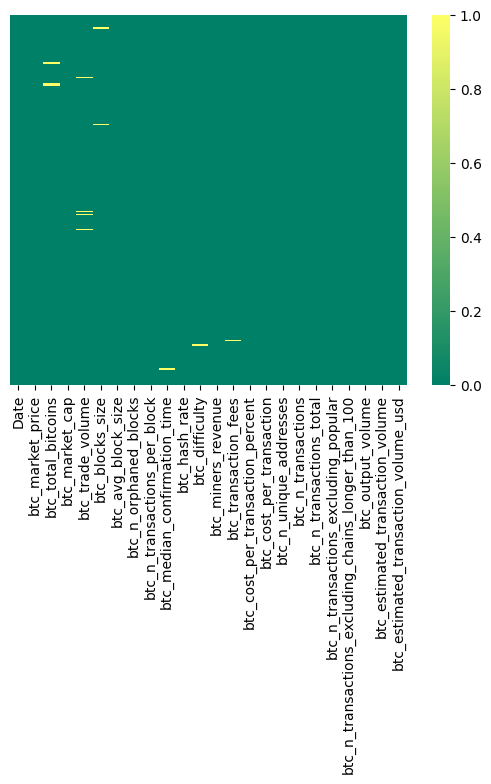

In [203]:
sns.heatmap(df.isna(), yticklabels= False , cmap='summer')

# EDA

## Using Pipeline

In [204]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import OutlierTrimmer
from sklearn import set_config

In [205]:
set_config(display='diagram')

In [206]:
df = df.drop('Date',axis=1)

In [207]:
median_imputer = MeanMedianImputer(imputation_method='mean')
ot = OutlierTrimmer(capping_method='quantiles' , tail='right' , fold=0.05)

In [208]:
pipe = Pipeline([('Missing Values', median_imputer), ('Outliers', ot)])
pipe

Pipeline(steps=[('Missing Values', MeanMedianImputer(imputation_method='mean')),
                ('Outliers',
                 OutlierTrimmer(capping_method='quantiles', fold=0.05))])

In [209]:
df_new = pipe.fit_transform(df)

In [210]:
df_new.shape , df.shape

((1987, 23), (2906, 23))

---
---

### Feature Scaling

In [211]:
df_copy = df_new
X = df_copy.drop('btc_market_price',axis=1)
Y = df_copy['btc_market_price']  

In [212]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=92)  

In [213]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [214]:
from scikeras.wrappers import KerasRegressor

In [215]:
scaler = StandardScaler()

In [216]:
def build_model():
    model_nn = Sequential()

    model_nn.add(Dense(25, input_dim=X.shape[1], activation='relu')) # Input layer 1
    model_nn.add(Dense(10, activation='relu')) # Hidden layer 2
    model_nn.add(Dense(8, activation='relu')) # Hidden layer 3
    model_nn.add(Dense(5, activation='relu')) # Hidden layer 4
    model_nn.add(Dense(1,activation='linear')) # Output layer 

    model_nn.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics='accuracy')
    return model_nn

In [217]:
model = KerasRegressor(model=build_model, verbose=1)

In [218]:
pipe2 = Pipeline(steps=[('scaler' , scaler) , 
                        ('model' , model)])

In [219]:
pipe2

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KerasRegressor(model=<function build_model at 0x000001A0739DE0D8>))])

In [220]:
pipe2.fit(X_train,Y_train, model__epochs=500)

Epoch 1/500


44/44 [==============================] - 3s 2ms/step - loss: 261.7192 - accuracy: 0.0309
Epoch 2/500
44/44 [==============================] - 0s 2ms/step - loss: 259.9948 - accuracy: 0.0115
Epoch 3/500
44/44 [==============================] - 0s 2ms/step - loss: 254.6146 - accuracy: 0.0014
Epoch 4/500
44/44 [==============================] - 0s 3ms/step - loss: 239.3055 - accuracy: 0.0281
Epoch 5/500
44/44 [==============================] - 0s 3ms/step - loss: 193.9619 - accuracy: 0.0317
Epoch 6/500
44/44 [==============================] - 0s 2ms/step - loss: 112.2623 - accuracy: 0.0324
Epoch 7/500
44/44 [==============================] - 0s 2ms/step - loss: 86.9825 - accuracy: 0.0309
Epoch 8/500
44/44 [==============================] - 0s 2ms/step - loss: 68.6261 - accuracy: 0.0309
Epoch 9/500
44/44 [==============================] - 0s 2ms/step - loss: 49.0555 - accuracy: 0.0309
Epoch 10/500
44/44 [==============================] - 0s 2ms/step - loss: 38.0558 - accuracy: 0.0309
Epoch

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KerasRegressor(model=<function build_model at 0x000001A0739DE0D8>))])

In [221]:
Y_pred_net = pipe2.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [222]:
#Using MEAN ABSOLUTE ERROR,R2 SCORE as evaluation matrix
from sklearn.metrics import mean_absolute_error,r2_score

In [223]:
mae_net = mean_absolute_error(Y_pred_net,Y_test)
print('MAE FOR NEURAL NETWORK :',mae_net)
r2_net = r2_score(Y_pred_net,Y_test)
print('R2 SCORE FOR NEURAL NETWORK :',r2_net)

MAE FOR NEURAL NETWORK : 2.564279105922865
R2 SCORE FOR NEURAL NETWORK : 0.9997846078029925
